<a href="https://colab.research.google.com/github/ralfferreira/representacao-genero-jogos/blob/main/Representa%C3%A7%C3%A3o_de_genero_nos_jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Representação de gênero nos jogos**

# Versão utilizada

In [ ]:
!python --version

Python 3.8.16


# Análise dos personagens e da equipe desenvolvedora

## Importando os dados

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

characters_dataset = pd.read_csv('characters.grivg.csv')
games_dataset = pd.read_csv('games.grivg.csv')
sexualization_dataset = pd.read_csv('sexualization.grivg.csv')

In [ ]:
characters_dataset.info()
characters_dataset.isna().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               637 non-null    object
 1   Gender             637 non-null    object
 2   Game               637 non-null    object
 3   Age                637 non-null    object
 4   Age_range          637 non-null    object
 5   Playable           637 non-null    int64 
 6   Sexualization      637 non-null    int64 
 7   Id                 637 non-null    object
 8   Species            637 non-null    object
 9   Side               637 non-null    object
 10  Relevance          637 non-null    object
 11  Romantic_Interest  637 non-null    object
dtypes: int64(2), object(10)
memory usage: 59.8+ KB


False

In [ ]:
games_dataset = games_dataset.drop('Unnamed: 27', axis=1)
games_dataset.info()
games_dataset.isna().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Game_Id               64 non-null     object 
 1   Title                 64 non-null     object 
 2   Release               64 non-null     object 
 3   Series                27 non-null     object 
 4   Genre                 64 non-null     object 
 5   Sub-genre             64 non-null     object 
 6   Developer             64 non-null     object 
 7   Publisher             64 non-null     object 
 8   Country               64 non-null     object 
 9   Platform              64 non-null     object 
 10  PEGI                  64 non-null     int64  
 11  Customizable_main     64 non-null     object 
 12  Protagonist           64 non-null     int64  
 13  Protagonist_Non_Male  64 non-null     int64  
 14  Relevant_males        64 non-null     int64  
 15  Relevant_no_males     64 

True

In [ ]:
sexualization_dataset.info()
sexualization_dataset.isna().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    637 non-null    object
 1   Sexualized_clothing   637 non-null    int64 
 2   Trophy                637 non-null    int64 
 3   Damsel in Distress    637 non-null    int64 
 4   Sexualized Cutscenes  637 non-null    int64 
 5   Total                 637 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 30.0+ KB


False

# Paleta de cores

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Análise dos Personagens

In [ ]:
characters_sorted = characters_dataset.sort_values('Sexualization')

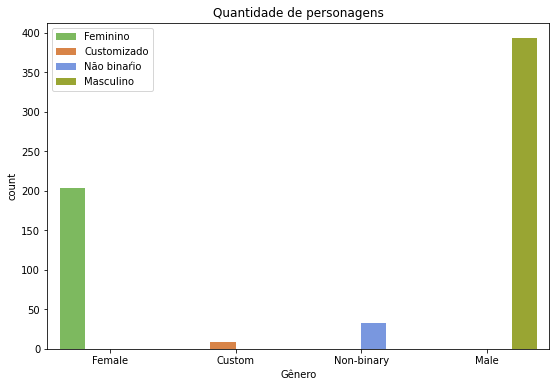

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x='Gender', data=characters_dataset, palette=pkmn_type_colors, hue='Gender')
plt.title('Quantidade de personagens')
plt.xlabel('Gênero')
plt.legend(labels=["Feminino", "Customizado", "Não binaŕio", "Masculino"], loc = 2)

plt.show()

## Faixa Etária

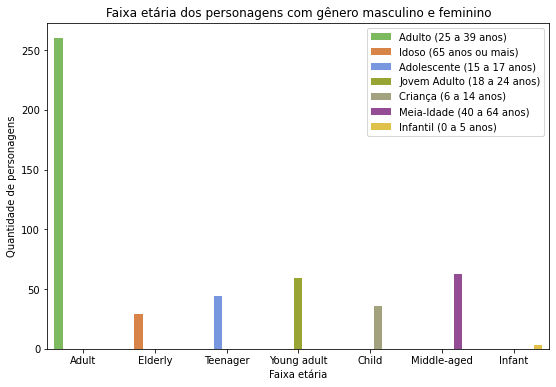

In [ ]:
characters_dataset.drop(characters_dataset[characters_dataset['Age_range'] == 'Unknown'].index, inplace = True)
characters_sorted.drop(characters_sorted[characters_sorted['Gender'] == 'Non-binary'].index, inplace = True)
age = characters_dataset.loc[characters_dataset['Gender'] != 'Custom']
plt.figure(figsize=(9,6))
sns.countplot(x='Age_range', data=age, palette=pkmn_type_colors, hue='Age_range')
plt.title('Faixa etária dos personagens com gênero masculino e feminino')
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de personagens')
plt.legend(labels=["Adulto (25 a 39 anos)", "Idoso (65 anos ou mais)", "Adolescente (15 a 17 anos)", "Jovem Adulto (18 a 24 anos)", "Criança (6 a 14 anos)", "Meia-Idade (40 a 64 anos)", "Infantil (0 a 5 anos)"], loc = 1)

plt.show()

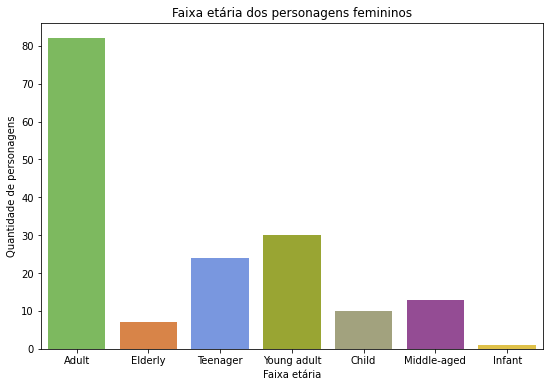

In [ ]:
age = characters_dataset.loc[characters_dataset['Gender'] == 'Female']
plt.figure(figsize=(9,6))
sns.countplot(x='Age_range', data=age, palette=pkmn_type_colors)
plt.title('Faixa etária dos personagens femininos')
plt.ylabel('Quantidade de personagens')
plt.xlabel('Faixa etária')
plt.show()

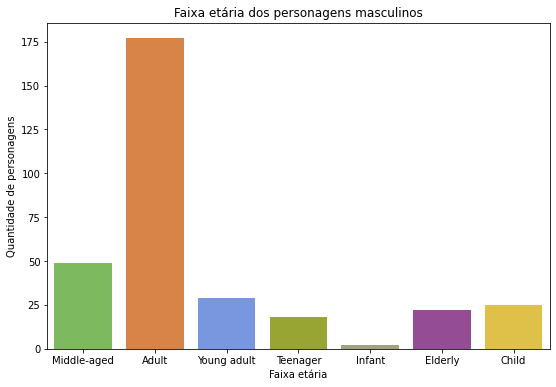

In [ ]:
age = characters_dataset.loc[characters_dataset['Gender'] == 'Male']
plt.figure(figsize=(9,6))
sns.countplot(x='Age_range', data=age, palette=pkmn_type_colors)
plt.title('Faixa etária dos personagens masculinos')
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de personagens')
plt.show()

In [ ]:
characters_sorted.drop(characters_sorted[characters_sorted['Sexualization'] == 0].index, inplace = True)
characters_sorted.drop(characters_sorted[characters_sorted['Gender'] == 'Non-binary'].index, inplace = True)

## Personagens Sexualizados

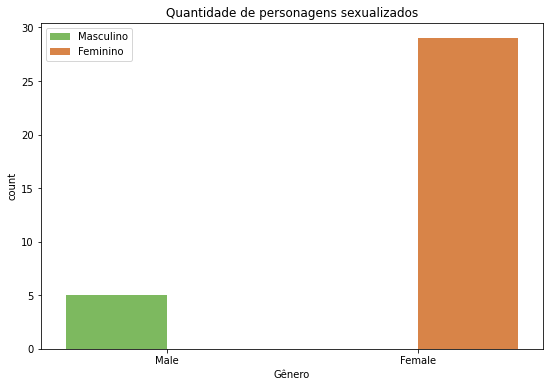

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x='Gender', data=characters_sorted, palette=pkmn_type_colors, hue='Gender')
plt.title('Quantidade de personagens sexualizados')
plt.xlabel('Gênero')
plt.legend(labels=["Masculino", "Feminino"], loc = 2)
plt.show()

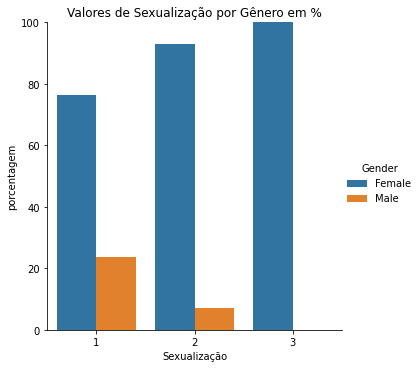

In [ ]:
x,y = 'Sexualization', 'Gender'

df1 = characters_sorted.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('porcentagem').reset_index()
g = sns.catplot(x=x,y='porcentagem',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.title('Valores de Sexualização por Gênero em %')
plt.xlabel('Sexualização')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()

## Personagens Jogáveis

In [ ]:
characters_dataset.drop(characters_dataset[characters_dataset['Gender'] == 'Non-binary'].index, inplace = True)
playable_data = characters_dataset.loc[characters_dataset['Gender'] != 'Custom']

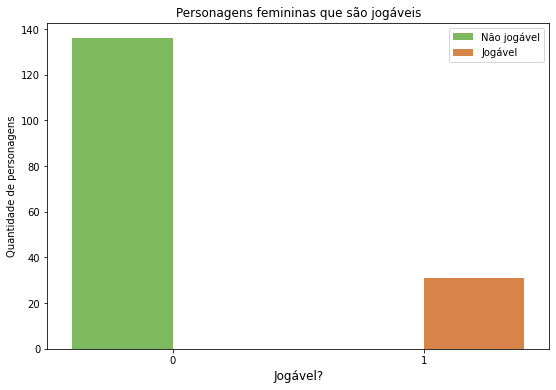

In [ ]:
female = characters_dataset.groupby('Gender').get_group('Female')
plt.figure(figsize=(9,6))
sns.countplot(x='Playable', data=female, palette=pkmn_type_colors, hue='Playable')
plt.title('Personagens femininas que são jogáveis')
plt.ylabel('Quantidade de personagens')
plt.xlabel('Jogável?', fontsize=12)
plt.legend(labels=["Não jogável", "Jogável"])
plt.show()

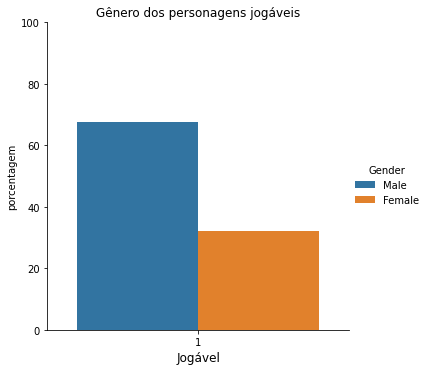

In [ ]:
characters_dataset.drop(characters_dataset[characters_dataset['Playable'] == 0].index, inplace = True)
playable_data = characters_dataset.loc[characters_dataset['Gender'] != 'Custom']
x,y = 'Playable', 'Gender'

df1 = playable_data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('porcentagem').reset_index()

g = sns.catplot(x=x,y='porcentagem',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.title('Gênero dos personagens jogáveis')
plt.xlabel('Jogável', fontsize=12)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()

## Relevância dos personagens

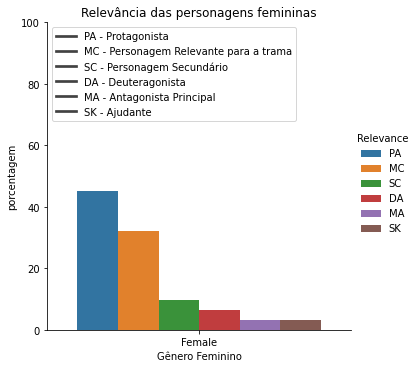

In [ ]:
female = characters_dataset.groupby('Gender').get_group('Female')
x,y = 'Gender', 'Relevance'

df1 = female.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('porcentagem').reset_index()

g = sns.catplot(x=x,y='porcentagem',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.xlabel('Gênero Feminino')
plt.legend(labels=["PA - Protagonista", "MC - Personagem Relevante para a trama", "SC - Personagem Secundário", "DA - Deuteragonista", "MA - Antagonista Principal", "SK - Ajudante"], loc = 2)
plt.title('Relevância das personagens femininas')
plt.show()

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()

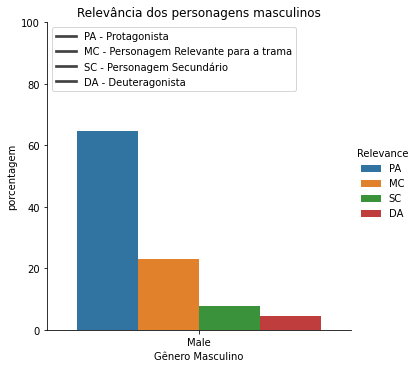

In [ ]:
male = characters_dataset.groupby('Gender').get_group('Male')

df1 = male.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('porcentagem').reset_index()

g = sns.catplot(x=x,y='porcentagem',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.xlabel('Gênero Masculino')
plt.legend(labels=["PA - Protagonista", "MC - Personagem Relevante para a trama", "SC - Personagem Secundário", "DA - Deuteragonista"], loc = 2)
plt.title('Relevância dos personagens masculinos')
plt.show()

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()

# Equipe dos jogos

Text(0.5, 1.0, 'Número de integrantes na equipe desenvolvedora do jogo')

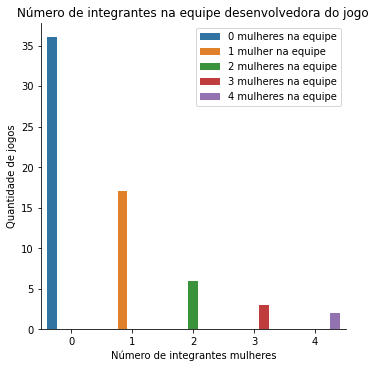

In [ ]:
games_dataset_sorted = games_dataset.sort_values('female_team', ascending=True)

sns.catplot(x="female_team", kind="count", data=games_dataset_sorted, hue='female_team') 
plt.xlabel('Número de integrantes mulheres')
plt.ylabel('Quantidade de jogos')
plt.legend(labels=["0 mulheres na equipe", "1 mulher na equipe", "2 mulheres na equipe", "3 mulheres na equipe", "4 mulheres na equipe"], loc = 1)
plt.title('Número de integrantes na equipe desenvolvedora do jogo')

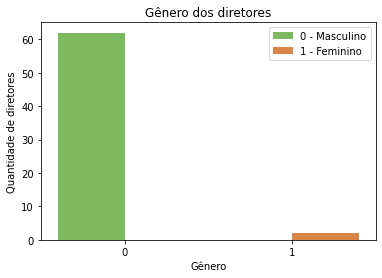

In [ ]:
games_dataset['Director'] = games_dataset['Director'].map({'M':0,'F':1})
sns.countplot(x='Director', data=games_dataset, palette=pkmn_type_colors, hue='Director')
plt.ylabel('Quantidade de diretores')
plt.xlabel('Gênero')
plt.legend(labels=["0 - Masculino", "1 - Feminino"], loc = 1)
plt.title('Gênero dos diretores')
plt.show()

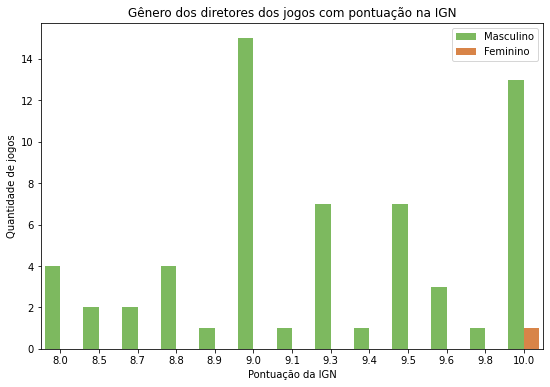

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x='IGN', data=games_dataset.nlargest(64,'IGN'), palette=pkmn_type_colors, hue='Director')
plt.ylabel('Quantidade de jogos')
plt.xlabel('Pontuação da IGN')
plt.legend(labels=["Masculino", "Feminino"])
plt.title('Gênero dos diretores dos jogos com pontuação na IGN')
plt.show()

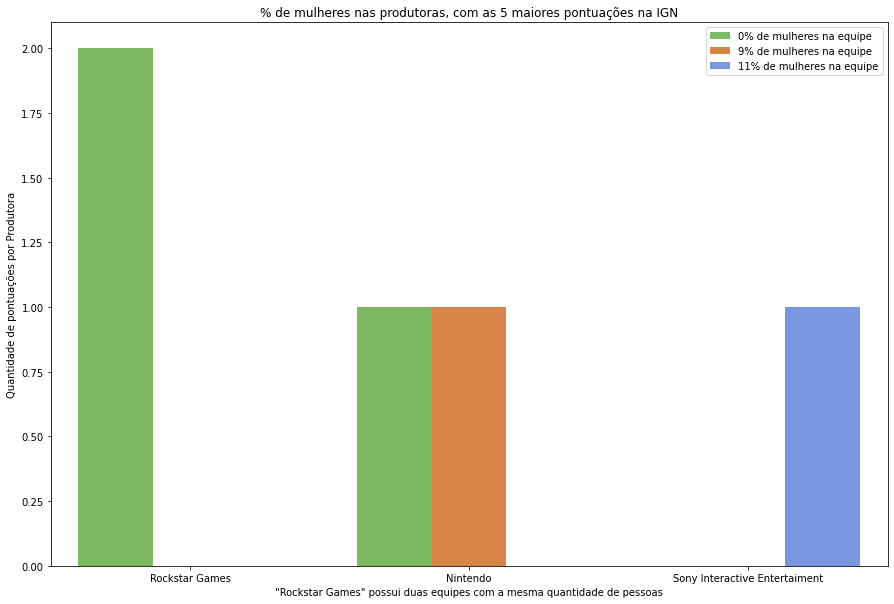

In [ ]:
games_dataset_largest = games_dataset.nlargest(5,'IGN')
plt.figure(figsize=(15, 10))
sns.countplot(x='Publisher', data=games_dataset_largest, palette=pkmn_type_colors, hue='Team_percentage')
plt.ylabel('Quantidade de pontuações por Produtora')
plt.xlabel('"Rockstar Games" possui duas equipes com a mesma quantidade de pessoas')
plt.legend(labels=["0% de mulheres na equipe", "9% de mulheres na equipe", "11% de mulheres na equipe"], loc = 1)
plt.title('% de mulheres nas produtoras, com as 5 maiores pontuações na IGN')
plt.show()